In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

In [2]:
df = pd.read_csv('../../logs/cluster/large.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 8 columns):
Unnamed: 0                 257 non-null int64
mpi                        257 non-null float64
mt                         257 non-null float64
num_nodes                  257 non-null float64
num_processes_per_node     257 non-null float64
num_threads_per_process    257 non-null float64
sd                         257 non-null float64
time                       257 non-null float64
dtypes: float64(7), int64(1)
memory usage: 16.1 KB


In [3]:
df.mpi = df.mpi.astype(np.uint8)
df.mt = df.mt.astype(np.uint8)
df.num_nodes = df.num_nodes.astype(np.uint8)
df.num_processes_per_node = df.num_processes_per_node.astype(np.uint8)
df.num_threads_per_process = df.num_threads_per_process.astype(np.uint8)
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
mpi                        257 non-null uint8
mt                         257 non-null uint8
num_nodes                  257 non-null uint8
num_processes_per_node     257 non-null uint8
num_threads_per_process    257 non-null uint8
sd                         257 non-null float64
time                       257 non-null float64
dtypes: float64(2), uint8(5)
memory usage: 5.3 KB


In [12]:
def reshape(processes, threads, Z):
    print(len(processes))
    print(len(threads))
    print(len(Z))
    
    X = processes.as_matrix().reshape(8, 8)
    Y = threads.as_matrix().reshape(8, 8)
    Z = Z.as_matrix().reshape(8, 8)
    return X, Y, Z

def plot(num_nodes):
    ndf = df.loc[df.num_nodes == num_nodes]
    if num_nodes == 1:
        ndf = ndf.iloc[1:]
    threedee = plt.figure().gca(projection='3d')
    X, Y, Z = reshape(ndf.num_processes_per_node, ndf.num_threads_per_process, df.iloc[0].time/ndf.time)
    threedee.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    threedee.set_xlabel('# processes')
    threedee.set_ylabel('# threads')
    threedee.set_zlabel('speedup')
    plt.show()

<IPython.core.display.Javascript object>


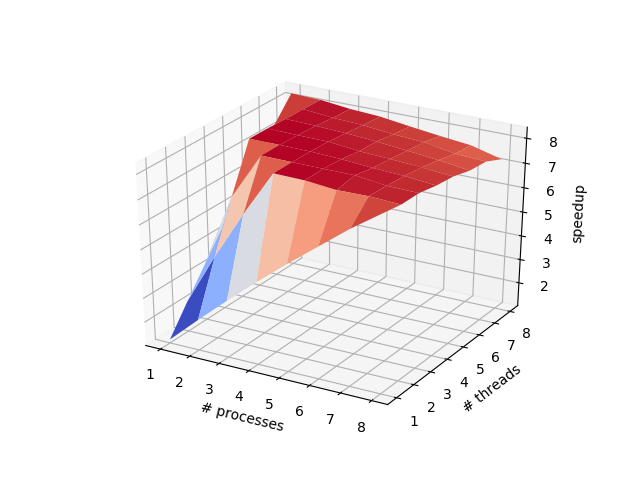

64
64
64


In [23]:
plot(1)